In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [53]:
df = pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [55]:
df.isnull().sum().sum()

np.int64(0)

In [56]:
numeric_colms = df.columns[:10]

# for col in numeric_colms:
# 	plt.boxplot(df[col])
# 	plt.title(col)
# 	plt.show()


In [57]:
for col in numeric_colms:
	Q1 = df[col].quantile(0.25)
	Q3 = df[col].quantile(0.75)
	IQR = Q3 -Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [58]:
# for col in numeric_colms:
# 	plt.boxplot(df[col])
# 	plt.title(col)
# 	plt.show()

In [59]:
# for xgboost we need the target coulmn to start from 0
encoder = LabelEncoder()
df['Cover_Type'] = encoder.fit_transform(df['Cover_Type'])

In [60]:
x = df.drop(columns=['Cover_Type']).values
y = df['Cover_Type'].values

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [63]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
random_forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [67]:
xgboost = XGBClassifier(random_state=42)
xgboost.fit(x_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [68]:
y_decision_tree_pred = decision_tree.predict(x_test)
y_random_forest_pred = random_forest.predict(x_test)
y_xgboost_pred = xgboost.predict(x_test)

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_decision_tree_pred))
print("Classification Report:\n", classification_report(y_test, y_decision_tree_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_decision_tree_pred))
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_random_forest_pred))
print("Classification Report:\n", classification_report(y_test, y_random_forest_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_random_forest_pred))
print("\nXGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_xgboost_pred))
print("Classification Report:\n", classification_report(y_test, y_xgboost_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_xgboost_pred))


Decision Tree Classifier:
Accuracy: 0.9372156013001084
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     35893
           1       0.95      0.95      0.95     45733
           2       0.92      0.92      0.92      3857
           3       0.69      0.71      0.70       139
           4       0.81      0.82      0.81      1471
           5       0.87      0.88      0.87      2152
           6       0.95      0.94      0.94      3055

    accuracy                           0.94     92300
   macro avg       0.87      0.88      0.88     92300
weighted avg       0.94      0.94      0.94     92300

Confusion Matrix:
 [[33670  2033     4     0    40    10   136]
 [ 2042 43247   116     0   213    92    23]
 [    3   113  3536    29    21   155     0]
 [    0     0    21    99     0    19     0]
 [   33   216    15     0  1199     8     0]
 [    4    86   154    16     8  1884     0]
 [  164    21     0     0     0    

<BarContainer object of 3 artists>

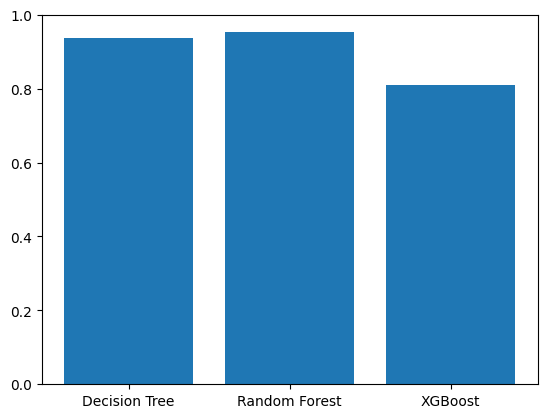

In [ ]:
plt.bar(['Decision Tree', 'Random Forest', 'XGBoost'],
        [accuracy_score(y_test, y_decision_tree_pred),
		accuracy_score(y_test, y_random_forest_pred),
		accuracy_score(y_test, y_xgboost_pred)])